In [171]:
import pandas as pd
import numpy as np
from plotnine import *

- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# Exercício 1
- Faça os Learning checks LC7.1 – LC7.7 propostos em [31] (https://moderndive.com/7-sampling.html).

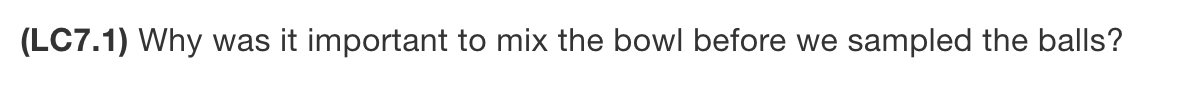

**RESPOSTA:**

Misturar as bolas foi importante para garantir a aleatoriedade, evitando com as mesmas estivessem enviesadas, com cores predominantes em algumas regiões.

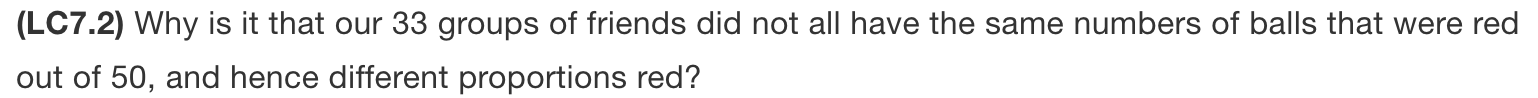

**RESPOSTA:**

O número de bolas vermelhas não foi igual para todas as pessoas porque trata-se um evento com aleatoriedades. Cada retirada de bolas é um evento independente e não existe garantia de número de bolas vermelhas a serem retiradas - é possível verificar apenas uma tendência estatística da proporção se manter em certos valores.

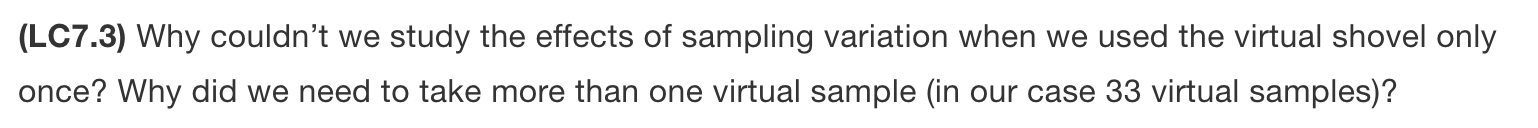


**RESPOSTA:**

Não é possível verificar os efeitos da variação de amostragem com apenas uma retirada porque isso se consiste em apenas uma amostra. O estudo da variação de amostragem requer múltiplas amostras.

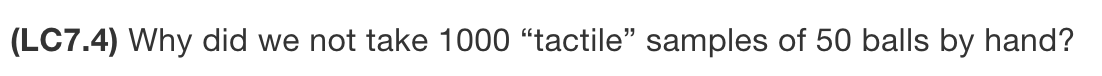

**RESPOSTA:**

Porque este seria um serviço manual exaustivo e praticamente inviável, dependendo do tempo disponível. Para casos como este, o uso de ferramentas computacionais acaba se tornando essencial.

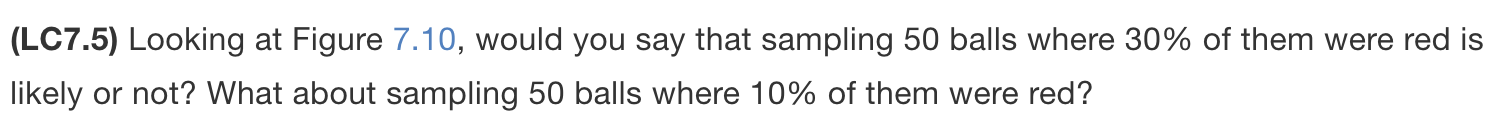

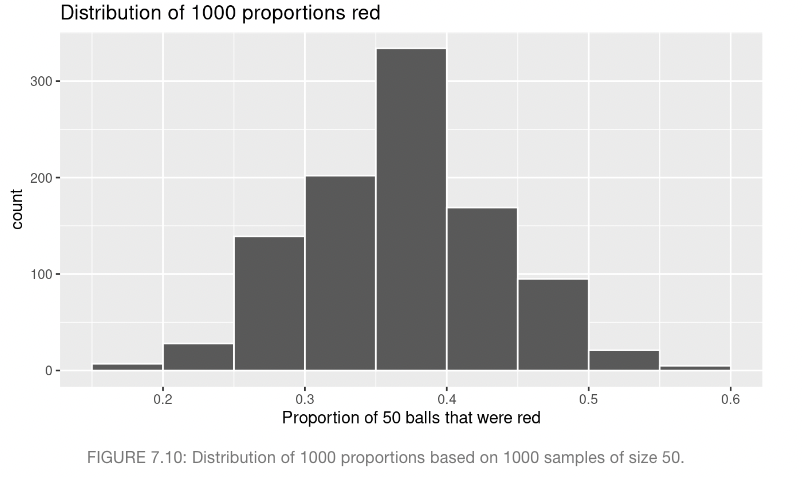

**RESPOSTA:**

A partir do histograma, percebe-se que o caso de 30% de bolas vermelhas é factível e moderadamente provável, porém nem tanto quanto uma proporção de 40%, que aparenta ser uma média aproximada e moda da distribuição. Já o caso de 10% de bolas vermelhas é muito improvável, já que está localizado na extremidade do histograma.

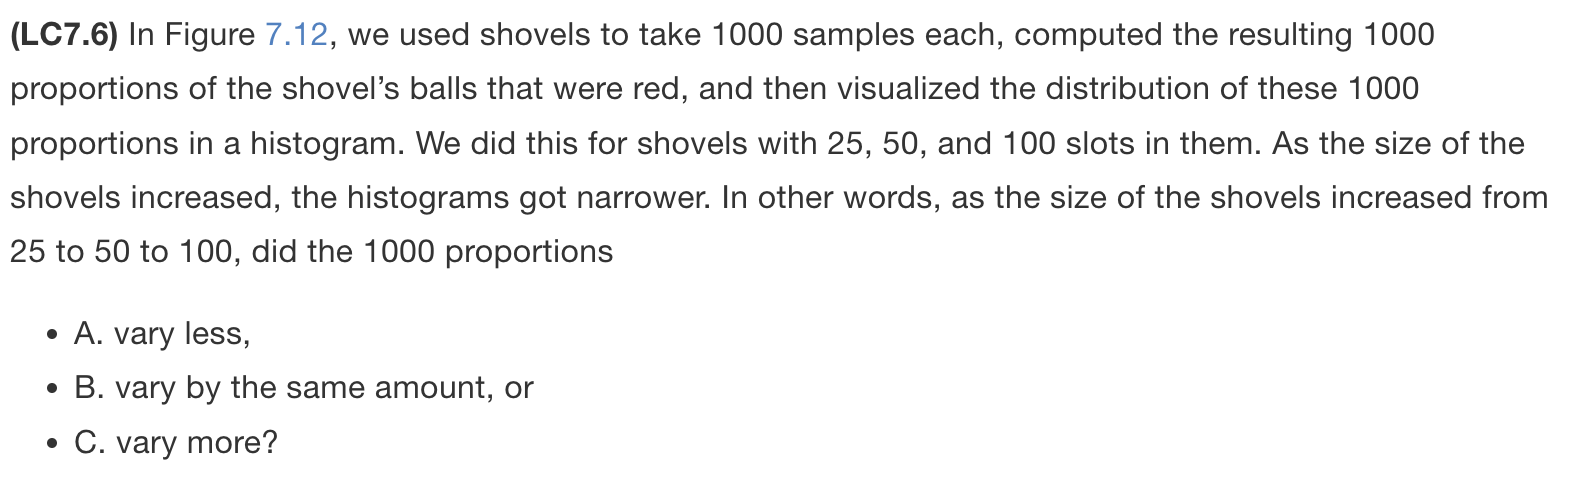

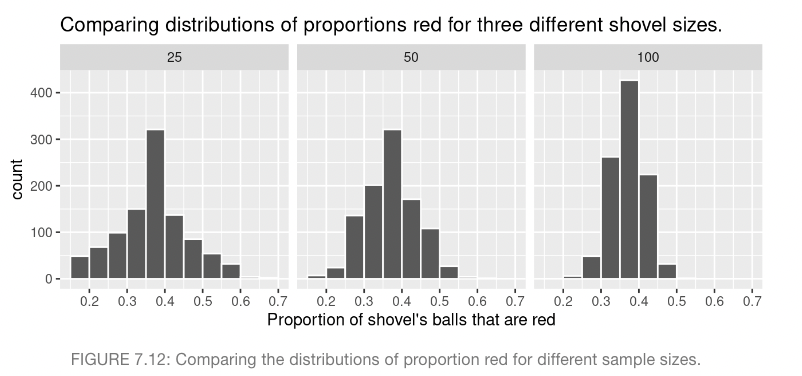

**RESPOSTA:**

O aumento da taxa de amostragem implica numa menor variação do histograma, tornando-o mais "fino". A alternativa correta é a letra **(C)**.




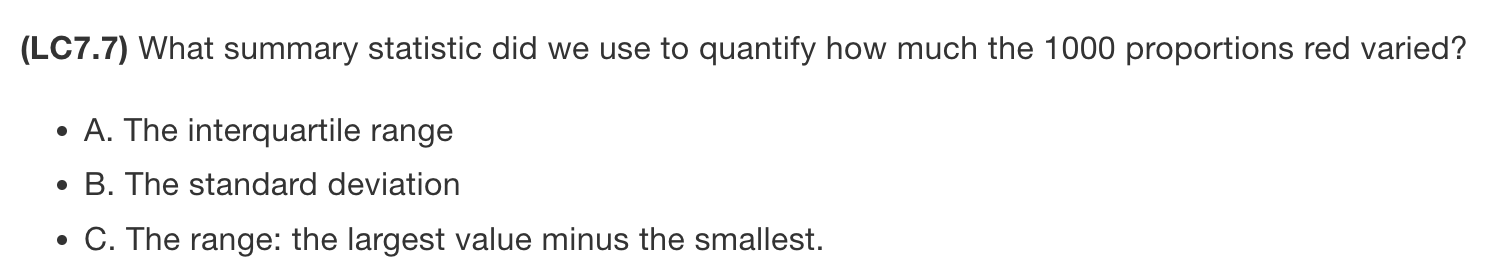

**RESPOSTA:**

O desvio padrão é utilizado para representar a variação de um histograma. A alternativa correta é a letra **(B)**.

# Exercício 2
Qual é a probabilidade teórica e empírica da ocorrência do evento (cara, coroa, cara) ao lançarmos simultaneamente três moedas? Realize simulações de Monte Carlo para comparar os resultados obtidos por ambas as abordagens. 

Dica: A probabilidade teórica de ocorrêencia do evento (cara,coroa, cara) ao lançar simultaneamente três moedas pode ser calculada utilizando o princípio da multiplicação para eventos independentes. Cada lançamento é independente e a probabilidade de obter cara/coroa em cada moeda justa é 0.5.

**RESPOSTA:**

## Probabilidade Teórica
- A probabilidade teórica de se ocorrer cara, coroa e cara pode ser obtida pela simples multiplicação de 0.5 x 0.5 x 0.5, resultando em 0.125.

## Probabilidade Empírica
- Segue abaixo o script utilizado para realizar uma simulação de Monte Carlos para estimativa de probabilidade. Tomou-se como base um total de 10.000 amostras e utililou-se a função randint(), que utiliza de uma distribuição uniforme de valores 0 e 1. Observou-se que o resultado deu muito próximo do teórico.

In [172]:
# Simulação de Monte Carlo para moedas

num_experimentos = 10000
num_lancamentos = 3

# 0 = cara, 1 = coroa
moedas = np.random.randint(0, 2, size=(num_experimentos, num_lancamentos))

# Calcula todas as possibilidades de resultados
unique_values = np.unique(moedas, axis=0)

cara_coroa_cara = np.array([0, 1, 0])

# Calcula a probabilidade de sair cara, coroa, cara
prob = np.sum(np.all(moedas == cara_coroa_cara, axis=1)) / num_experimentos

print(f'Probabilidade de sair cara, coroa, cara: {prob:.3f}')

Probabilidade de sair cara, coroa, cara: 0.127


# Exercício 3

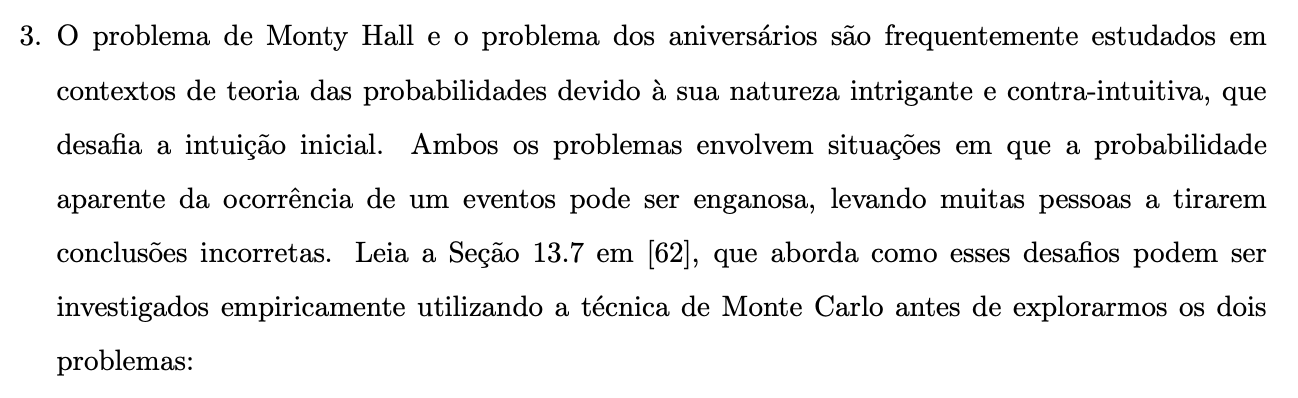

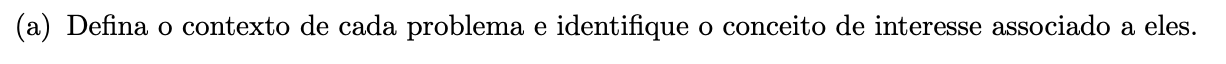

## Mounty Hall

O problema de Monty Hall surgiu de um famoso programa de televisão, no qual existem três portas: atrás de uma delas está um prêmio, enquanto as outras duas ocultam derrotas. O participante escolhe inicialmente uma das três portas, e em seguida o apresentador revela uma das portas restantes que não contém o prêmio. Neste momento, o participante deve decidir se mantém sua escolha original ou se troca para a outra porta que permanece fechada.

A intuição humana frequentemente leva a acreditar que trocar de porta não faria diferença, mas, na verdade, trocar dobra as chances de ganhar o prêmio. Esse resultado, que contraria a intuição comum, tornou o problema de Monty Hall bastante conhecido no ensino de probabilidade, ilustrando a importância de uma análise probabilística cuidadosa em situações aparentemente simples.


## Problema dos aniversários

O problema dos aniversários é outro exemplo clássico abordado em cursos de probabilidade. Ele demonstra que, em um grupo relativamente pequeno de pessoas (por exemplo, 50), a probabilidade de pelo menos duas delas compartilharem o mesmo dia de aniversário é surpreendentemente alta. Intuitivamente, pode parecer que seria necessário um grupo maior, com cerca de 365 pessoas (o número de dias no ano), para que essa coincidência seja provável. No entanto, a análise estatística revela que a probabilidade de uma coincidência de aniversários em grupos bem menores é muito maior do que a intuição comum sugere, evidenciando mais uma vez a diferença entre percepção intuitiva e realidade probabilística.


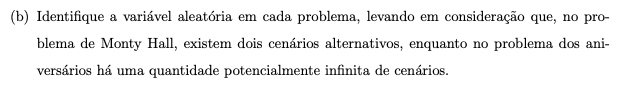

No problema de Monty Hall, a variável aleatória é a porta que tem o prêmio. O participante tem duas opções: continuar com a porta inicial ou trocar após o apresentador revelar uma porta errada. São apenas esses dois cenários possíveis.

Já no problema dos aniversários, a variável aleatória é a coincidência de duas ou mais pessoas fazerem aniversário no mesmo dia. Como existem muitas combinações possíveis de dias de aniversário para as pessoas do grupo, temos uma quantidade muito maior de cenários possíveis.

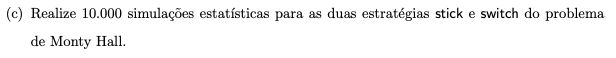

Além do número de experimentos, foi necessário definir um número de amostras por experimento para garantir que o alinhamento com o teorema do limite central. Definiu-se 100 amostras por experimento porque é um número razoavelmente grande mas que permite que os experimentos sejam executados dentro de um tempo razoavelmente factível.

In [173]:
def simulacao_monty_hall(num_amostras: int, troca: bool, seed=42):
    np.random.seed(seed)

    vitorias = 0

    for _ in range(num_amostras):
        # Define a porta que contém o prêmio
        premio = np.random.randint(0, 3)

        # Jogador escolhe uma porta
        escolha = np.random.randint(0, 3)

        # Monty abre uma porta que não é a escolha do jogador nem tem o prêmio
        portas_disponiveis = [porta for porta in range(3) if porta != escolha and porta != premio]
        porta_aberta = np.random.choice(portas_disponiveis)

        # Se o jogador escolher trocar
        if troca:
            # Jogador troca para a porta restante
            escolha = [porta for porta in range(3) if porta != escolha and porta != porta_aberta][0]

        # Verifica se a escolha final foi a porta com o prêmio
        if escolha == premio:
            vitorias += 1

    # Calcula a proporção de vitórias
    prob_vitoria = vitorias / num_amostras

    return prob_vitoria

def experimentos_mounty_hall(num_experimentos: int, num_amostras: int, troca: bool, seed=42):

    vitorias = []

    np.random.seed(seed)

    random_seed = np.random.randint(0, 1000, size=num_experimentos)

    for _ in range(num_experimentos):
        vitorias.append(simulacao_monty_hall(num_amostras, troca, seed=random_seed[_]))

    return np.array(vitorias)


prob_vitorias_sem_troca = experimentos_mounty_hall(10000, 100, False)
prob_vitorias_com_troca = experimentos_mounty_hall(10000, 100, True)

media_vitorias_sem_troca = np.mean(prob_vitorias_sem_troca)
media_vitorias_com_troca = np.mean(prob_vitorias_com_troca)

print(f'Porcentagem de vitórias sem troca: {media_vitorias_sem_troca:.3f}')
print(f'Porcentagem de vitórias com troca: {media_vitorias_com_troca:.3f}')


Porcentagem de vitórias sem troca: 0.333
Porcentagem de vitórias com troca: 0.667


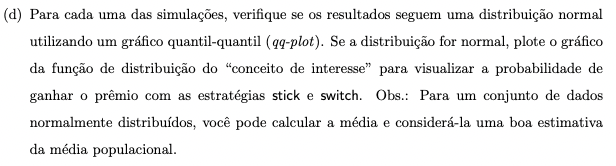

## Plotando o QQ-Plot para o experimento sem troca de portas

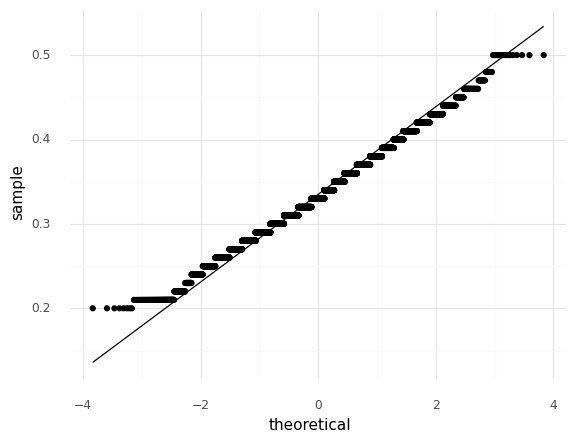

In [174]:
data = pd.DataFrame({'value': prob_vitorias_sem_troca})

# Criar o gráfico Q-Q com plotnine
plot = (
    ggplot(data, aes(sample='value')) +
    geom_qq() +
    geom_qq_line() +  # Adiciona uma linha de referência
    theme_minimal()  # Estilo de tema limpo
)

print(plot)

## Plotando o QQ-Plot para o experimento com troca de portas

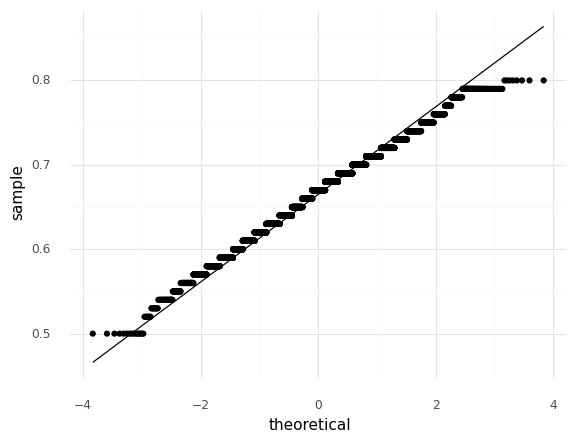

In [175]:
data = pd.DataFrame({'value': prob_vitorias_com_troca})

# Criar o gráfico Q-Q com plotnine
plot = (
    ggplot(data, aes(sample='value')) +
    geom_qq() +
    geom_qq_line() +  # Adiciona uma linha de referência
    theme_minimal()  # Estilo de tema limpo
)

print(plot)

Percebe-se que ambos os experimentos seguem uma distribuição gaussiana, uma vez que os resultados seguiram próximos da linha de 45 graus nos dois casos. Seguiremos, portanto com a visualização da distribuição das probabilidades.

## Histograma e função de distribuição do experimento sem troca de portas

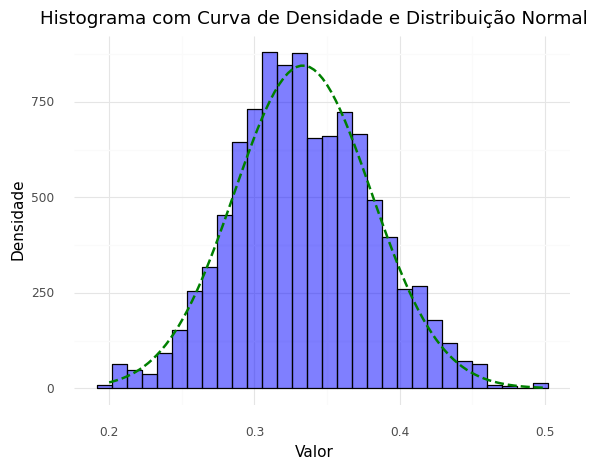

In [176]:
data = pd.DataFrame({'value': prob_vitorias_sem_troca})

mean_val = np.mean(data['value'])
std_val = np.std(data['value'])

bins = 30

# Calcula o intervalo dos bins
bin_width = (data['value'].max() - data['value'].min()) / bins
n = len(data['value'])

# Função para calcular a densidade da distribuição normal ajustada à escala do histograma
normal_dist = lambda x: (1/(std_val * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_val) / std_val)**2) * bin_width * n

# Plota o histograma com a curva de densidade dos dados e a distribuição normal ajustada
plot = (
    ggplot(data, aes(x='value')) +
    geom_histogram(bins=bins, fill="blue", alpha=0.5, color="black") +  # Ajusta o histograma para densidade
    stat_function(fun=normal_dist, color="green", size=1, linetype="dashed") +  # Curva de densidade normal ajustada
    theme_minimal() +
    labs(title="Histograma com Curva de Densidade e Distribuição Normal", 
         x="Valor", y="Densidade")  
)

print(plot)

## Histograma e função de distribuição do experimento com troca de portas

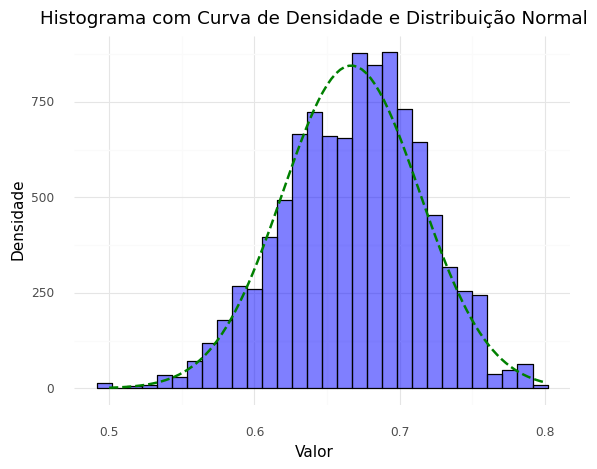

In [177]:
data = pd.DataFrame({'value': prob_vitorias_com_troca})

mean_val = np.mean(data['value'])
std_val = np.std(data['value'])

bins = 30

# Calcula o intervalo dos bins
bin_width = (data['value'].max() - data['value'].min()) / bins
n = len(data['value'])

# Função para calcular a densidade da distribuição normal ajustada à escala do histograma
normal_dist = lambda x: (1/(std_val * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_val) / std_val)**2) * bin_width * n

# Plota o histograma com a curva de densidade dos dados e a distribuição normal ajustada
plot = (
    ggplot(data, aes(x='value')) +
    geom_histogram(bins=bins, fill="blue", alpha=0.5, color="black") +  # Ajusta o histograma para densidade
    stat_function(fun=normal_dist, color="green", size=1, linetype="dashed") +  # Curva de densidade normal ajustada
    theme_minimal() +
    labs(title="Histograma com Curva de Densidade e Distribuição Normal", 
         x="Valor", y="Densidade")  
)

print(plot)

O traço pontilhado nos dois gráficos é a função de probabilidade assumindo um comportamento normal. Pode-se notar que ela se ajustou adequadamente ao histograma, mostrando que os resultados tiveram um distribuição normal, conforme previsto.

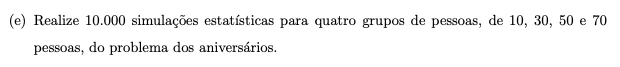

Assim como no experimento de Monty Hall, foi necessário definir uma valor de amostragem. Aqui, definiu-se este valor como 200 pelos mesmos motivos citados anteriormente.

In [178]:
def simulacao_aniversarios(num_experimentos, tam_grupo):
    aniversarios = np.random.randint(1, 366, size=(num_experimentos, tam_grupo))
    num_aniversarios_iguais = np.sum([len(set(aniversario)) < tam_grupo for aniversario in aniversarios])
    prob = num_aniversarios_iguais / num_experimentos
    return prob

def experimentos_aniversarios(num_experimentos, tam_grupo, num_amostras, seed=42):
    np.random.seed(seed)

    probs = []

    for _ in range(num_experimentos):
        probs.append(simulacao_aniversarios(num_amostras, tam_grupo))

    return np.array(probs)

probs_10 = experimentos_aniversarios(10000, 10, 200)
print(f'Probabilidade de ter aniversarios iguais em um grupo de 10 pessoas: {np.mean(probs_10):.3f}')

probs_30 = experimentos_aniversarios(10000, 30, 200)
print(f'Probabilidade de ter aniversarios iguais em um grupo de 30 pessoas: {np.mean(probs_30):.3f}')

probs_50 = experimentos_aniversarios(10000, 50, 200)
print(f'Probabilidade de ter aniversarios iguais em um grupo de 50 pessoas: {np.mean(probs_50):.3f}')

probs_70 = experimentos_aniversarios(10000, 70, 200)
print(f'Probabilidade de ter aniversarios iguais em um grupo de 70 pessoas: {np.mean(probs_70):.3f}')



Probabilidade de ter aniversarios iguais em um grupo de 10 pessoas: 0.117
Probabilidade de ter aniversarios iguais em um grupo de 30 pessoas: 0.706
Probabilidade de ter aniversarios iguais em um grupo de 50 pessoas: 0.970
Probabilidade de ter aniversarios iguais em um grupo de 70 pessoas: 0.999


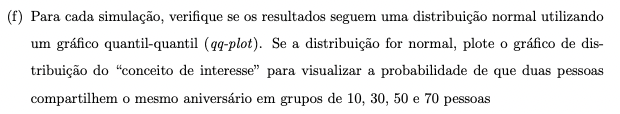

## Plotando o QQ-Plot para o experimento com um grupo de 10 pessoas

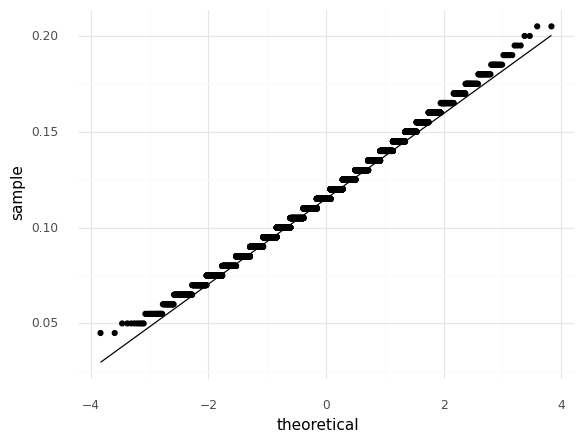

In [179]:
data = pd.DataFrame({'value': probs_10})

# Criar o gráfico Q-Q com plotnine
plot = (
    ggplot(data, aes(sample='value')) +
    geom_qq() +
    geom_qq_line() +  # Adiciona uma linha de referência
    theme_minimal()  # Estilo de tema limpo
)

print(plot)

## Plotando o QQ-Plot para o experimento com um grupo de 30 pessoas

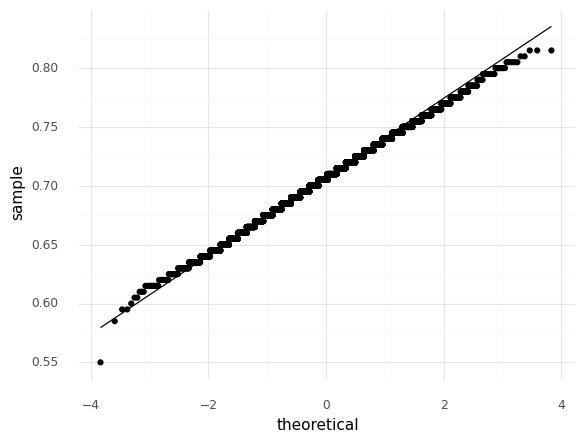

In [180]:
data = pd.DataFrame({'value': probs_30})

# Criar o gráfico Q-Q com plotnine
plot = (
    ggplot(data, aes(sample='value')) +
    geom_qq() +
    geom_qq_line() +  # Adiciona uma linha de referência
    theme_minimal()  # Estilo de tema limpo
)

print(plot)

## Plotando o QQ-Plot para o experimento com um grupo de 50 pessoas

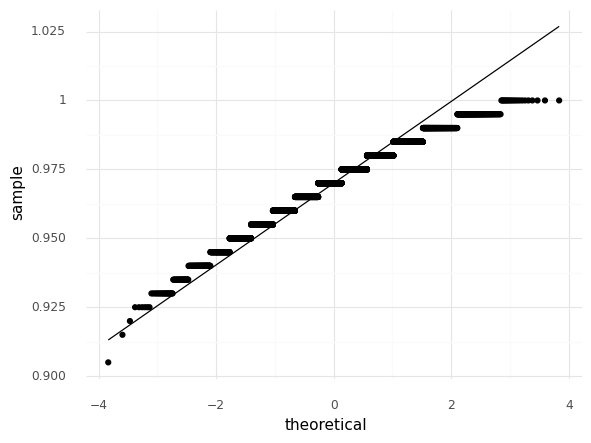

In [181]:
data = pd.DataFrame({'value': probs_50})

# Criar o gráfico Q-Q com plotnine
plot = (
    ggplot(data, aes(sample='value')) +
    geom_qq() +
    geom_qq_line() +  # Adiciona uma linha de referência
    theme_minimal()  # Estilo de tema limpo
)

print(plot)

## Plotando o QQ-Plot para o experimento com um grupo de 70 pessoas

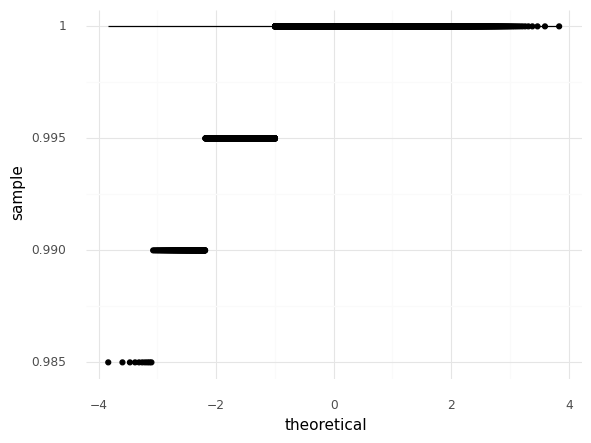

In [182]:
data = pd.DataFrame({'value': probs_70})

# Criar o gráfico Q-Q com plotnine
plot = (
    ggplot(data, aes(sample='value')) +
    geom_qq() +
    geom_qq_line() +  # Adiciona uma linha de referência
    theme_minimal()  # Estilo de tema limpo
)

print(plot)

Analisando os gráficos, percebe-se que conforme o número de pessoas no grupo aumenta, mais os dados se afastam de uma distribuição normal. Os grupos de 10 e 30 pessoas possuem claramente uma distribuição normal de dados, já que os pontos nos qq-plots estão bem concentrados na linha de 45 graus. A partir do grupo de 50 pessoas, é possível notar que os dados estão significativamente menos adequados a serem representados por uma distribuição normal. O grupo de 70 pessoas mostra um caso extremo. Isso ocorre porque quanto maior o número de pessoas, mais provável é que tenha ao menos dois aniversariantes. Num grupo de 70 pessoas, é praticamente certo que isso acontece.


Como temos apenas dois grupos com distribuição normal, apenas eles terão a distribuição plotada, conforme gráficos abaixo.

## Histograma e função de distribuição do experimento com um grupo de 10 pessoas

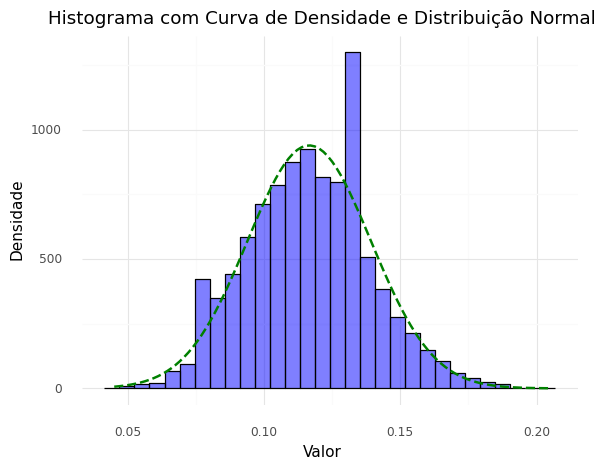

In [183]:
data = pd.DataFrame({'value': probs_10})

mean_val = np.mean(data['value'])
std_val = np.std(data['value'])

bins = 30

# Calcula o intervalo dos bins
bin_width = (data['value'].max() - data['value'].min()) / bins
n = len(data['value'])

# Função para calcular a densidade da distribuição normal ajustada à escala do histograma
normal_dist = lambda x: (1/(std_val * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_val) / std_val)**2) * bin_width * n

# Plota o histograma com a curva de densidade dos dados e a distribuição normal ajustada
plot = (
    ggplot(data, aes(x='value')) +
    geom_histogram(bins=bins, fill="blue", alpha=0.5, color="black") +  # Ajusta o histograma para densidade
    stat_function(fun=normal_dist, color="green", size=1, linetype="dashed") +  # Curva de densidade normal ajustada
    theme_minimal() +
    labs(title="Histograma com Curva de Densidade e Distribuição Normal", 
         x="Valor", y="Densidade")  
)

print(plot)

## Histograma e função de distribuição do experimento com um grupo de 30 pessoas

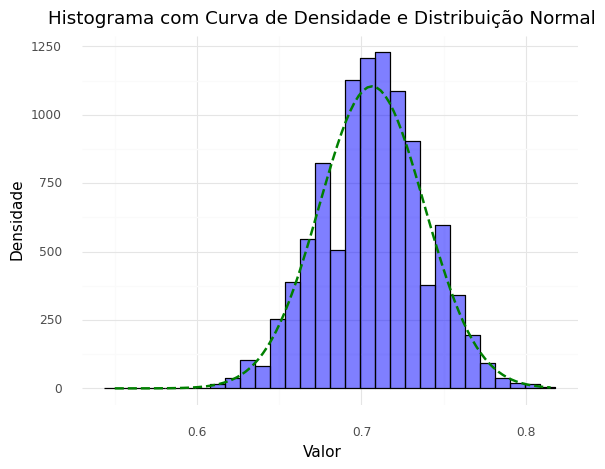

In [184]:
data = pd.DataFrame({'value': probs_30})

mean_val = np.mean(data['value'])
std_val = np.std(data['value'])

bins = 30

# Calcula o intervalo dos bins
bin_width = (data['value'].max() - data['value'].min()) / bins
n = len(data['value'])

# Função para calcular a densidade da distribuição normal ajustada à escala do histograma
normal_dist = lambda x: (1/(std_val * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_val) / std_val)**2) * bin_width * n

# Plota o histograma com a curva de densidade dos dados e a distribuição normal ajustada
plot = (
    ggplot(data, aes(x='value')) +
    geom_histogram(bins=bins, fill="blue", alpha=0.5, color="black") +  # Ajusta o histograma para densidade
    stat_function(fun=normal_dist, color="green", size=1, linetype="dashed") +  # Curva de densidade normal ajustada
    theme_minimal() +
    labs(title="Histograma com Curva de Densidade e Distribuição Normal", 
         x="Valor", y="Densidade")  
)

print(plot)

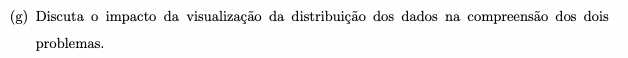

A visualização de dados mostrou-se uma maneira muito prática e intuitiva de se checar a normalidade dos dados. No exemplo do problema de Monty Hall, ficou claro que as probabilidades podem ser representadas por uma função de distribuição normal. Já para o problema dos aniversários, os resultados são ainda mais interessantes. Verificou-se apenas grupos menores possuem uma distribuição normal de probabilidade. A partir de um determinado número de pessoas, a probabilidade se torna praticamente 100%, não apresentando normalidade.